In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9a1d94e70b4fa87d2f7b81cf6257b0ae


In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ajdabiya
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | paamiut
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | bodinayakkanur
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | nioki
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | emba
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | oga
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | bathsheba
Pro

Processing Record 37 of Set 4 | kamennomostskiy
Processing Record 38 of Set 4 | college
Processing Record 39 of Set 4 | khormuj
City not found. Skipping...
Processing Record 40 of Set 4 | otradnoye
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | tevriz
Processing Record 43 of Set 4 | kaili
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | jalu
Processing Record 47 of Set 4 | port-cartier
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | madison
Processing Record 50 of Set 4 | halifax
Processing Record 1 of Set 5 | bucak
Processing Record 2 of Set 5 | north vernon
Processing Record 3 of Set 5 | samfya
Processing Record 4 of Set 5 | inverness
Processing Record 5 of Set 5 | loding
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | krasnyy yar
Processing Record 8 of Set 5 | babanka
Processing Record 9 of Set 5 | urosevac
City not found. Skipping...
Proce

Processing Record 27 of Set 8 | kutum
Processing Record 28 of Set 8 | hofn
Processing Record 29 of Set 8 | ulladulla
Processing Record 30 of Set 8 | ponta delgada
Processing Record 31 of Set 8 | anori
Processing Record 32 of Set 8 | namibe
Processing Record 33 of Set 8 | catalina
Processing Record 34 of Set 8 | shingu
Processing Record 35 of Set 8 | kadungora
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | chimbarongo
Processing Record 38 of Set 8 | tecpan
Processing Record 39 of Set 8 | bambous virieux
Processing Record 40 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 41 of Set 8 | temba
Processing Record 42 of Set 8 | krasnoshchekovo
Processing Record 43 of Set 8 | lagos
Processing Record 44 of Set 8 | sao filipe
Processing Record 45 of Set 8 | tanete
Processing Record 46 of Set 8 | terme
Processing Record 47 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 48 of Set 8 | maghama
City not found. Skipping...
Proce

Processing Record 8 of Set 12 | gangotri
City not found. Skipping...
Processing Record 9 of Set 12 | dwarka
Processing Record 10 of Set 12 | grand-santi
Processing Record 11 of Set 12 | kasama
Processing Record 12 of Set 12 | sokolo
Processing Record 13 of Set 12 | creel
Processing Record 14 of Set 12 | dali
Processing Record 15 of Set 12 | henzada
City not found. Skipping...
Processing Record 16 of Set 12 | beni suef
Processing Record 17 of Set 12 | jingdezhen
Processing Record 18 of Set 12 | polunochnoye
Processing Record 19 of Set 12 | genhe
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | sumbawanga
Processing Record 22 of Set 12 | senneterre
Processing Record 23 of Set 12 | rudnyy
Processing Record 24 of Set 12 | palu
Processing Record 25 of Set 12 | xinyu
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | ouadda
Processing Record 28 of Set 12 | belmonte
Processing Record 29 of Set 12 | sibolga
Proce

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ajdabiya,30.7554,20.2263,64.96,67,0,19.93,LY,2021-03-21 18:47:19
1,Narsaq,60.9167,-46.0500,26.60,68,75,11.50,GL,2021-03-21 18:47:19
2,New Norfolk,-42.7826,147.0587,59.00,73,17,2.15,AU,2021-03-21 18:47:20
3,Paamiut,61.9940,-49.6678,22.96,82,100,11.07,GL,2021-03-21 18:47:20
4,Georgetown,5.4112,100.3354,84.00,78,20,6.82,MY,2021-03-21 18:45:12
5,Te Anau,-45.4167,167.7167,46.58,96,100,1.05,NZ,2021-03-21 18:47:21
6,Bodinayakkanur,10.0167,77.3500,75.00,87,2,3.62,IN,2021-03-21 18:47:21
7,Hobart,-42.8794,147.3294,60.80,82,90,5.75,AU,2021-03-21 18:47:22
8,Port Alfred,-33.5906,26.8910,65.43,70,92,10.71,ZA,2021-03-21 18:47:22
9,Vao,-22.6667,167.4833,75.15,75,92,18.21,NC,2021-03-21 18:47:22


In [28]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ajdabiya,LY,2021-03-21 18:47:19,30.7554,20.2263,64.96,67,0,19.93
1,Narsaq,GL,2021-03-21 18:47:19,60.9167,-46.0500,26.60,68,75,11.50
2,New Norfolk,AU,2021-03-21 18:47:20,-42.7826,147.0587,59.00,73,17,2.15
3,Paamiut,GL,2021-03-21 18:47:20,61.9940,-49.6678,22.96,82,100,11.07
4,Georgetown,MY,2021-03-21 18:45:12,5.4112,100.3354,84.00,78,20,6.82
...,...,...,...,...,...,...,...,...,...
519,Ouadda,CF,2021-03-21 18:50:14,8.0777,22.4007,77.05,65,100,6.42
520,Belmonte,BR,2021-03-21 18:50:14,-15.8631,-38.8828,87.80,70,75,4.61
521,Sibolga,ID,2021-03-21 18:50:15,1.7427,98.7792,76.78,87,99,2.82
522,Srednekolymsk,RU,2021-03-21 18:50:15,67.4500,153.6833,-11.29,74,49,5.08


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1616352616.249759

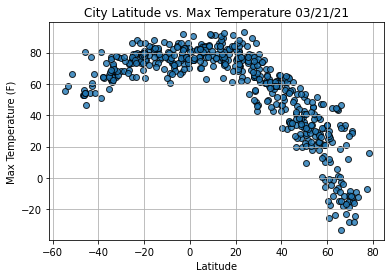

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

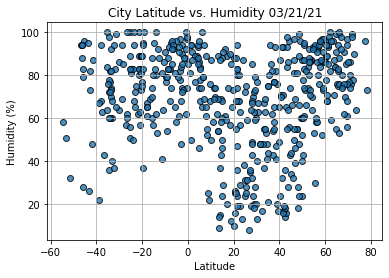

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


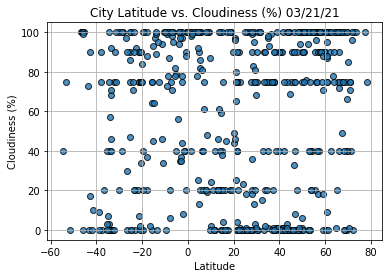

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

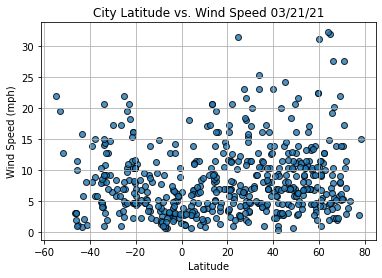

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ajdabiya,LY,2021-03-21 18:47:19,30.7554,20.2263,64.96,67,0,19.93
1,Narsaq,GL,2021-03-21 18:47:19,60.9167,-46.0500,26.60,68,75,11.50
3,Paamiut,GL,2021-03-21 18:47:20,61.9940,-49.6678,22.96,82,100,11.07
4,Georgetown,MY,2021-03-21 18:45:12,5.4112,100.3354,84.00,78,20,6.82
6,Bodinayakkanur,IN,2021-03-21 18:47:21,10.0167,77.3500,75.00,87,2,3.62


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

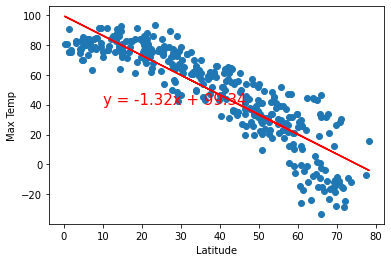

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

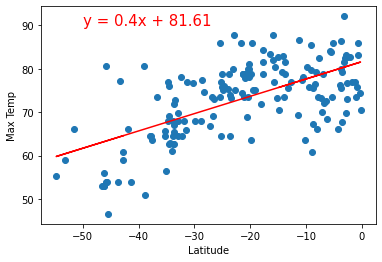

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

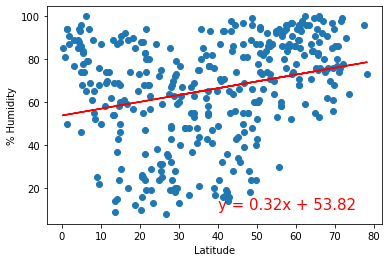

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

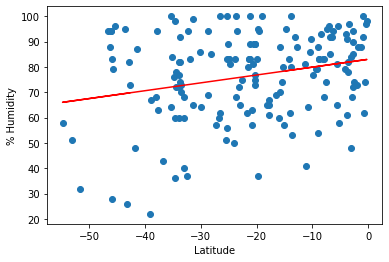

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

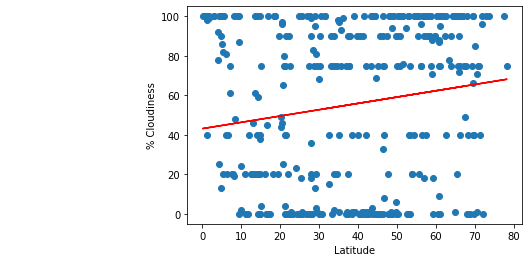

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

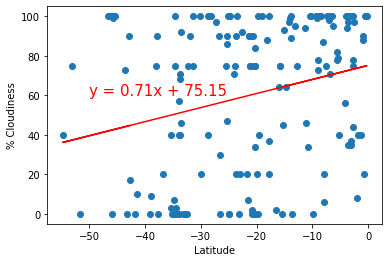

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

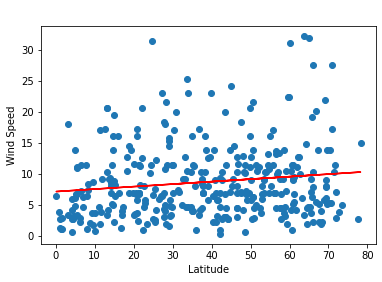

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

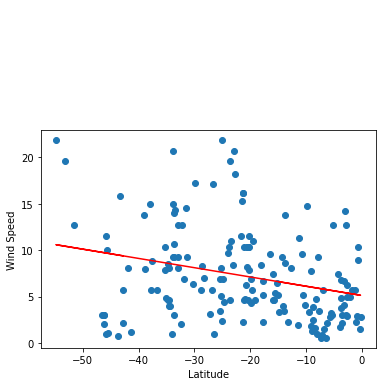

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))